In [13]:
# LinearRegression is a machine learning library for linear regression
from sklearn.linear_model import LinearRegression

# pandas and numpy are used for data manipulation
import pandas as pd
import numpy as np

# matplotlib and seaborn are used for plotting graphs
import matplotlib.pyplot as plt
%matplotlib inline
#plt.style.use('seaborn-darkgrid')

# yahoo finance is used to fetch data
import yfinance as yf

In [14]:
# Read data
Df = yf.download('GC=F', '2000-01-01', '2024-08-16',interval='1d')

#Df = yf.download('GC=F', '1900-05-22', '2024-05-29', auto_adjust=True,interval='1d')
##Df2 = yf.download('GLD', '2009-01-01', '2009-05-05', auto_adjust=True)

# saving the dataframe
Df.to_csv('../Database/gold_rate.csv')
#Df2.to_csv('../Database/gold_rate_2.csv')

[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['GC=F']: SSLError(MaxRetryError("HTTPSConnectionPool(host='query1.finance.yahoo.com', port=443): Max retries exceeded with url: /v1/test/getcrumb (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1007)')))"))


[*********************100%%**********************]  1 of 1 completed


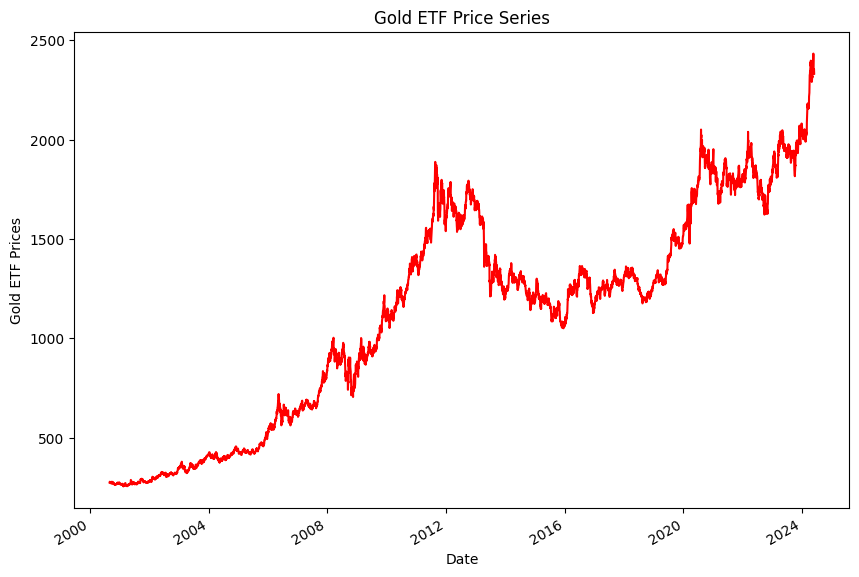

In [11]:
# Read data
Df = yf.download('GC=F', '2000-01-01', '2024-6-22', auto_adjust=True)
#Df = yf.download('GLD', '2000-01-01', '2024-6-22', auto_adjust=True)

# Only keep close columns
Df = Df[['Close']]

# Drop rows with missing values
Df = Df.dropna()

# Plot the closing price of GLD
Df.Close.plot(figsize=(10, 7),color='r')
plt.ylabel("Gold ETF Prices")
plt.title("Gold ETF Price Series")
plt.show()

In [12]:
# Define explanatory variables
Df['S_3'] = Df['Close'].rolling(window=3).mean()
Df['S_9'] = Df['Close'].rolling(window=9).mean()
Df['next_day_price'] = Df['Close'].shift(-1)

Df = Df.dropna()
X = Df[['S_3', 'S_9']]

# Define dependent variable
y = Df['next_day_price']

In [13]:
# Split the data into train and test dataset
t = .8
t = int(t*len(Df))

# Train dataset
X_train = X[:t]
y_train = y[:t]

# Test dataset
X_test = X[t:]
y_test = y[t:]

In [14]:
# Create a linear regression model
linear = LinearRegression().fit(X_train, y_train)
print("Linear Regression model")
print("Gold ETF Price (y) = %.2f * 3 Days Moving Average (x1) \
+ %.2f * 9 Days Moving Average (x2) \
+ %.2f (constant)" % (linear.coef_[0], linear.coef_[1], linear.intercept_))

Linear Regression model
Gold ETF Price (y) = 1.20 * 3 Days Moving Average (x1) + -0.20 * 9 Days Moving Average (x2) + 0.96 (constant)


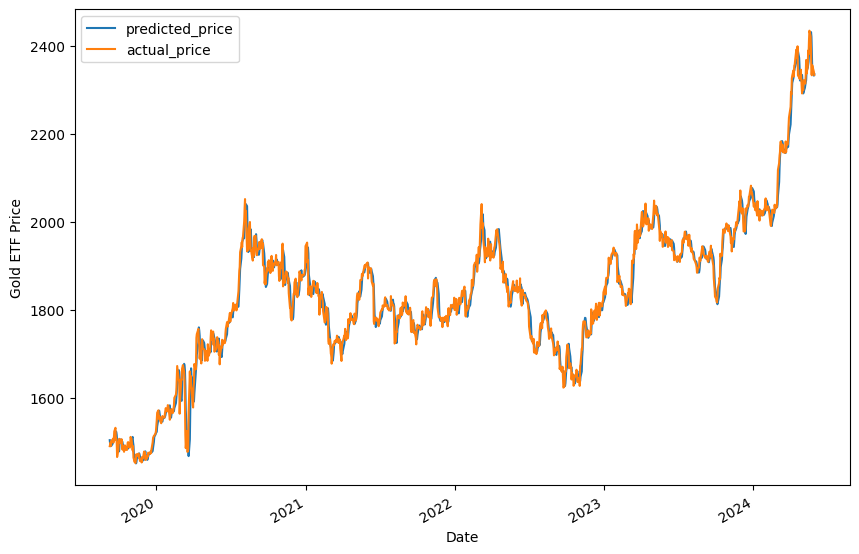

In [15]:
# Predicting the Gold ETF prices
predicted_price = linear.predict(X_test)
predicted_price = pd.DataFrame(
    predicted_price, index=y_test.index, columns=['price'])
predicted_price.plot(figsize=(10, 7))
y_test.plot()
plt.legend(['predicted_price', 'actual_price'])
plt.ylabel("Gold ETF Price")
plt.show()

In [16]:
# R square
r2_score = linear.score(X[t:], y[t:])*100
float("{0:.2f}".format(r2_score))

98.42